In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load cleaned dataset
df_cleaned = pd.read_csv('cleaned_heart_disease.csv')
X = df_cleaned.drop('target', axis=1)
y = df_cleaned['target']


Top 10 features from RF: ['thalach', 'oldpeak', 'cp_4', 'age', 'thal_7.0', 'chol', 'trestbps', 'exang', 'slope_2', 'sex']


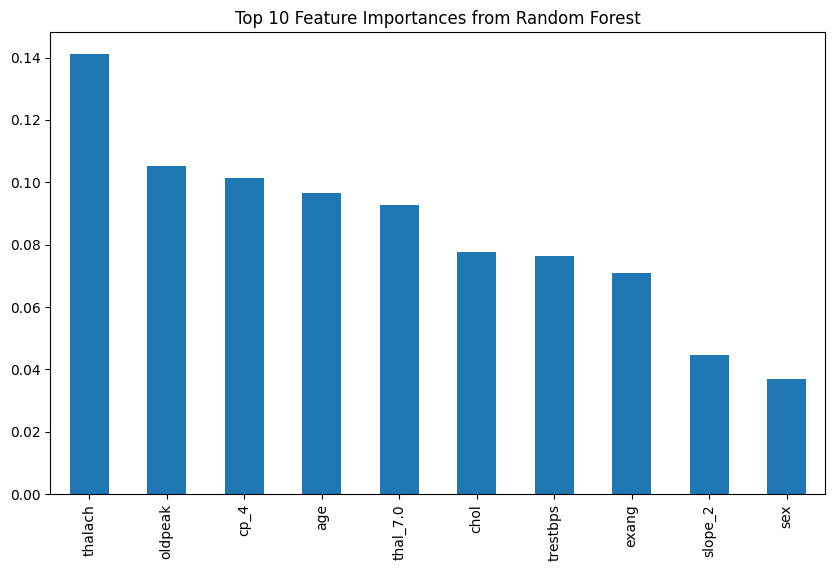

Top features from RFE: ['sex', 'exang', 'oldpeak', 'cp_2', 'cp_4', 'slope_2', 'thal_7.0', 'ca_1.0', 'ca_2.0', 'ca_3.0']
Top features from Chi-Square: ['thalach', 'exang', 'oldpeak', 'cp_2', 'cp_3', 'cp_4', 'slope_2', 'thal_7.0', 'ca_1.0', 'ca_2.0']
Reduced dataset saved as 'selected_features_heart_disease.csv'.


In [4]:
# 1. Random Forest Feature Importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
top_features_rf = importances.head(10).index.tolist()
print("Top 10 features from RF:", top_features_rf)

# Visualization: Feature importance bar plot
plt.figure(figsize=(10, 6))
importances.head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances from Random Forest')
plt.show()

# 2. Recursive Feature Elimination (RFE)
model = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)
rfe_features = X.columns[rfe.support_].tolist()
print("Top features from RFE:", rfe_features)

# 3. Chi-Square Test (for non-negative features; adjust if needed)
# Shift any negative values (e.g., after scaling) to non-negative for chi2
X_nonneg = X - X.min() if (X < 0).any().any() else X
chi2_selector = SelectKBest(chi2, k=10)
chi2_selector.fit(X_nonneg, y)
chi2_features = X.columns[chi2_selector.get_support()].tolist()
print("Top features from Chi-Square:", chi2_features)

# Select features (e.g., union or from RF)
selected_features = top_features_rf  # Use RF for this example
X_selected = X[selected_features]

# Save reduced dataset
selected_df = X_selected.copy()
selected_df['target'] = y
selected_df.to_csv('selected_features_heart_disease.csv', index=False)
print("Reduced dataset saved as 'selected_features_heart_disease.csv'.")